In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 MARKETING ANALYTICS DASHBOARD")
print("=" * 50)

📊 MARKETING ANALYTICS DASHBOARD



📈 Marketing Channel Performance:
      channel  marketing_spend  new_customers  revenue  visitors  conversions  \
0  Google Ads            10000            200    50000      5000          200   
1    Facebook             8000            160    35000      4000          160   
2       Email             2000            100    15000      2000          100   
3     Organic                0            150    30000      8000          150   
4    LinkedIn             5000             80    25000      1500           80   
5     YouTube             6000            120    28000      3000          120   

    CAC  ROAS  Conversion_Rate  
0  50.0  5.00             4.00  
1  50.0  4.38             4.00  
2  20.0  7.50             5.00  
3   0.0   inf             1.88  
4  62.5  5.00             5.33  
5  50.0  4.67             4.00  


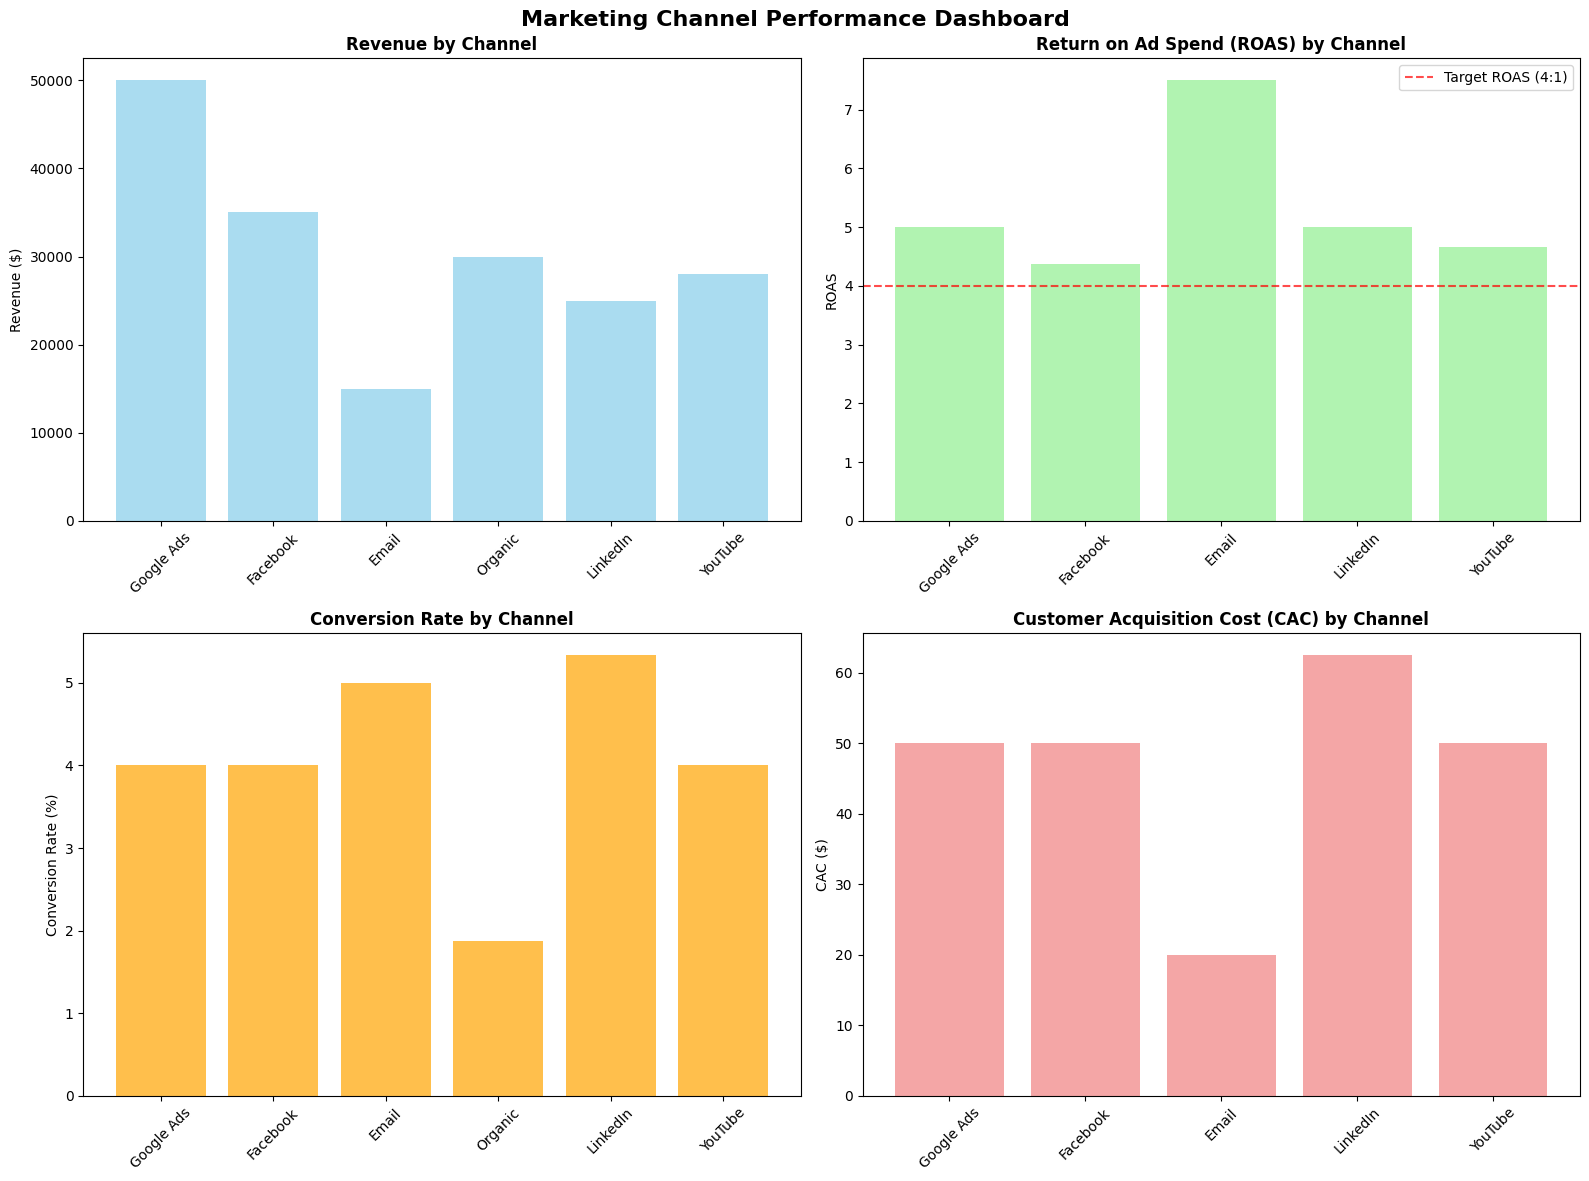

In [2]:
# ============================================================================
# 1. BASIC MARKETING METRICS WITH VISUALIZATIONS
# ============================================================================

class MarketingMetrics:
    def __init__(self, data):
        self.data = data
    
    def calculate_cac(self, marketing_spend, new_customers):
        """Calculate Customer Acquisition Cost"""
        return marketing_spend / new_customers if new_customers > 0 else 0
    
    def calculate_ltv(self, avg_order_value, purchase_frequency, customer_lifespan):
        """Calculate Customer Lifetime Value"""
        return avg_order_value * purchase_frequency * customer_lifespan
    
    def calculate_roas(self, revenue, ad_spend):
        """Calculate Return on Ad Spend"""
        return revenue / ad_spend if ad_spend > 0 else 0
    
    def conversion_rate(self, conversions, visitors):
        """Calculate Conversion Rate"""
        return (conversions / visitors) * 100 if visitors > 0 else 0

# Example usage of basic metrics
marketing_data = {
    'channel': ['Google Ads', 'Facebook', 'Email', 'Organic', 'LinkedIn', 'YouTube'],
    'marketing_spend': [10000, 8000, 2000, 0, 5000, 6000],
    'new_customers': [200, 160, 100, 150, 80, 120],
    'revenue': [50000, 35000, 15000, 30000, 25000, 28000],
    'visitors': [5000, 4000, 2000, 8000, 1500, 3000],
    'conversions': [200, 160, 100, 150, 80, 120]
}

df_marketing = pd.DataFrame(marketing_data)
metrics = MarketingMetrics(df_marketing)

# Calculate metrics for each channel
df_marketing['CAC'] = df_marketing.apply(
    lambda row: metrics.calculate_cac(row['marketing_spend'], row['new_customers']), axis=1
)
df_marketing['ROAS'] = df_marketing.apply(
    lambda row: metrics.calculate_roas(row['revenue'], row['marketing_spend']) if row['marketing_spend'] > 0 else np.inf, axis=1
)
df_marketing['Conversion_Rate'] = df_marketing.apply(
    lambda row: metrics.conversion_rate(row['conversions'], row['visitors']), axis=1
)

print("\n📈 Marketing Channel Performance:")
print(df_marketing.round(2))

# Visualize Marketing Channel Performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Marketing Channel Performance Dashboard', fontsize=16, fontweight='bold')

# 1. Revenue by Channel
axes[0, 0].bar(df_marketing['channel'], df_marketing['revenue'], color='skyblue', alpha=0.7)
axes[0, 0].set_title('Revenue by Channel', fontweight='bold')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. ROAS by Channel (exclude infinite values)
roas_data = df_marketing[df_marketing['ROAS'] != np.inf]
axes[0, 1].bar(roas_data['channel'], roas_data['ROAS'], color='lightgreen', alpha=0.7)
axes[0, 1].set_title('Return on Ad Spend (ROAS) by Channel', fontweight='bold')
axes[0, 1].set_ylabel('ROAS')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=4, color='red', linestyle='--', alpha=0.7, label='Target ROAS (4:1)')
axes[0, 1].legend()

# 3. Conversion Rate by Channel
axes[1, 0].bar(df_marketing['channel'], df_marketing['Conversion_Rate'], color='orange', alpha=0.7)
axes[1, 0].set_title('Conversion Rate by Channel', fontweight='bold')
axes[1, 0].set_ylabel('Conversion Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. CAC by Channel (exclude zero spend channels)
cac_data = df_marketing[df_marketing['marketing_spend'] > 0]
axes[1, 1].bar(cac_data['channel'], cac_data['CAC'], color='lightcoral', alpha=0.7)
axes[1, 1].set_title('Customer Acquisition Cost (CAC) by Channel', fontweight='bold')
axes[1, 1].set_ylabel('CAC ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



🔄 Cohort Retention Analysis:
week_number          0      1      2      3      4      5      6      7   \
acquisition_date                                                           
2023-01-01        0.723  0.596  0.532  0.383  0.426  0.319  0.255  0.170   
2023-01-02        0.873  0.764  0.709  0.436  0.545  0.400  0.200  0.218   
2023-01-03        0.786  0.714  0.548  0.595  0.381  0.405  0.357  0.286   
2023-01-04        0.788  0.692  0.673  0.423  0.404  0.269  0.423  0.269   
2023-01-05        0.810  0.672  0.621  0.448  0.379  0.362  0.310  0.362   

week_number          8      9      10     11  
acquisition_date                              
2023-01-01        0.255  0.149  0.213  0.213  
2023-01-02        0.200  0.145  0.255  0.164  
2023-01-03        0.190  0.143  0.214  0.143  
2023-01-04        0.154  0.192  0.154  0.135  
2023-01-05        0.224  0.155  0.138  0.069  


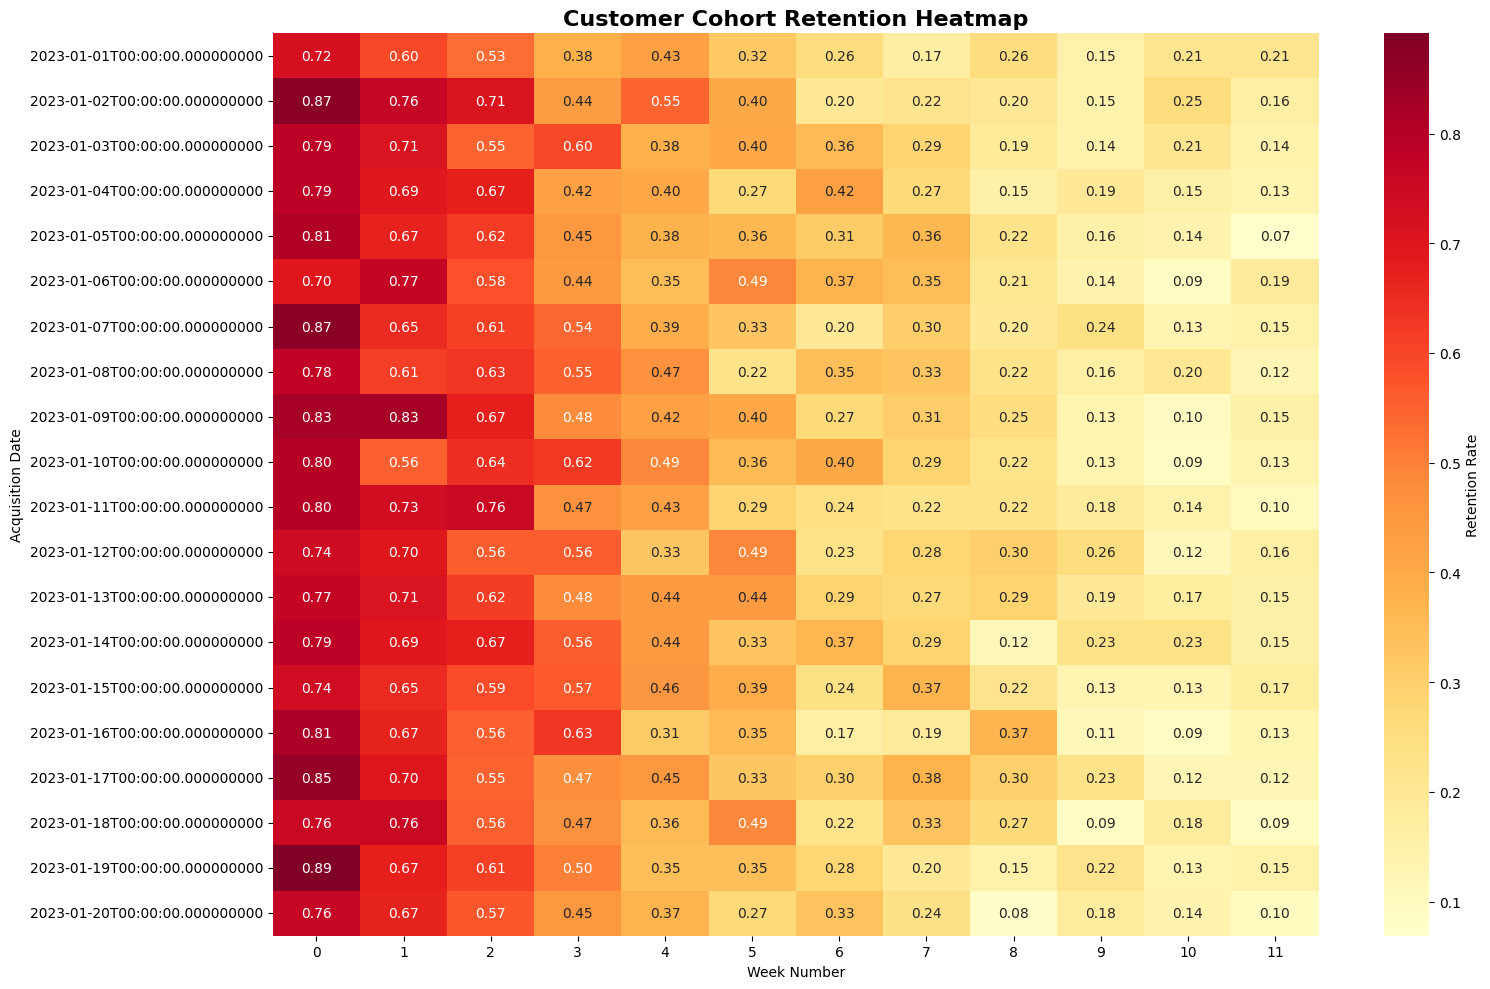

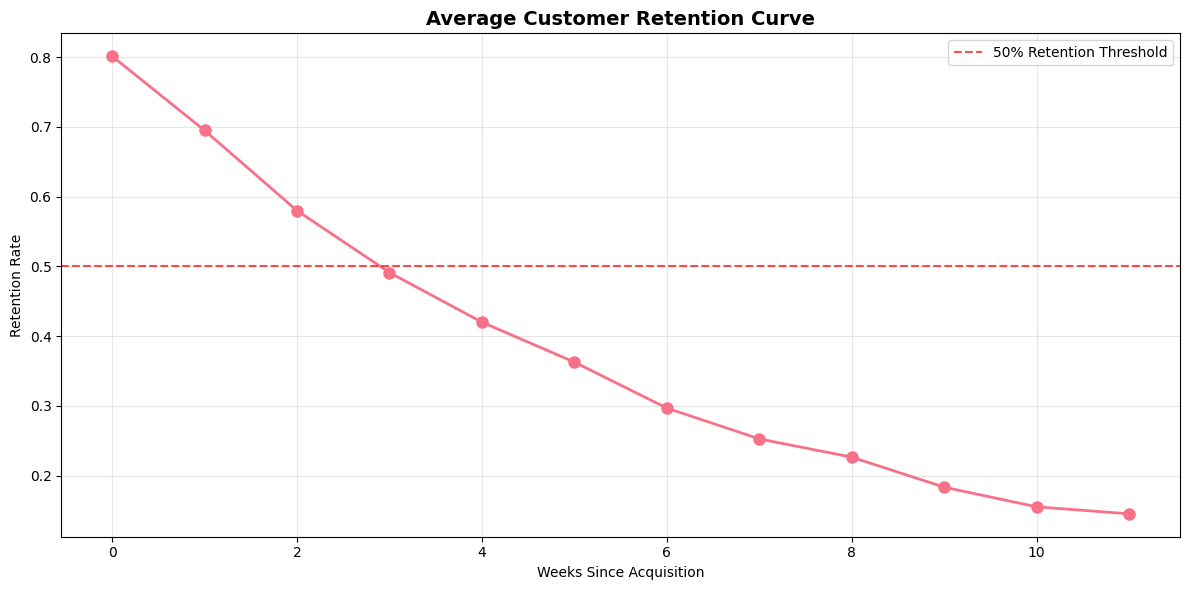

In [3]:
# ============================================================================
# 2. COHORT RETENTION ANALYSIS WITH HEATMAP
# ============================================================================

def create_cohort_data():
    """Generate sample customer cohort data"""
    np.random.seed(42)
    dates = pd.date_range('2023-01-01', '2023-04-01', freq='D')
    
    cohort_data = []
    for date in dates:
        n_customers = np.random.poisson(50)
        for i in range(n_customers):
            cohort_data.append({
                'customer_id': f"cust_{date.strftime('%Y%m%d')}_{i}",
                'acquisition_date': date,
                'first_purchase_date': date
            })
    
    return pd.DataFrame(cohort_data)

def calculate_cohort_retention(df):
    """Calculate cohort retention rates"""
    np.random.seed(42)
    purchase_data = []
    
    for _, customer in df.iterrows():
        current_date = customer['acquisition_date']
        for week in range(12):
            retention_prob = 0.8 * (0.85 ** week)  # Better retention for visualization
            if np.random.random() < retention_prob:
                purchase_data.append({
                    'customer_id': customer['customer_id'],
                    'purchase_date': current_date + timedelta(weeks=week),
                    'week_number': week
                })
    
    purchases = pd.DataFrame(purchase_data)
    cohort_purchases = df.merge(purchases, on='customer_id')
    
    # Calculate cohort retention
    cohort_retention = cohort_purchases.groupby(['acquisition_date', 'week_number']).size().reset_index(name='customers')
    cohort_sizes = df.groupby('acquisition_date').size().reset_index(name='cohort_size')
    
    cohort_retention = cohort_retention.merge(cohort_sizes, on='acquisition_date')
    cohort_retention['retention_rate'] = cohort_retention['customers'] / cohort_retention['cohort_size']
    
    return cohort_retention

# Generate and analyze cohort data
cohort_df = create_cohort_data()
retention_data = calculate_cohort_retention(cohort_df)

print(f"\n🔄 Cohort Retention Analysis:")
cohort_table = retention_data.pivot_table(index='acquisition_date', columns='week_number', values='retention_rate')
print(cohort_table.head().round(3))

# Visualize Cohort Retention Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(cohort_table.iloc[:20, :], # Show first 20 cohorts
            annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Retention Rate'})
plt.title('Customer Cohort Retention Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Week Number')
plt.ylabel('Acquisition Date')
plt.tight_layout()
plt.show()

# Average Retention Curve
avg_retention = cohort_table.mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_retention.index, avg_retention.values, marker='o', linewidth=2, markersize=8)
plt.title('Average Customer Retention Curve', fontsize=14, fontweight='bold')
plt.xlabel('Weeks Since Acquisition')
plt.ylabel('Retention Rate')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='50% Retention Threshold')
plt.legend()
plt.tight_layout()
plt.show()


🧪 A/B Test Results:
              test_name  control_rate  test_rate     lift  p_value  \
0  Email Subject A vs B        0.0850     0.0950  11.7647   0.4346   
1   Landing Page A vs B        0.0525     0.0725  38.0952   0.0984   
2     CTA Button A vs B        0.0558     0.0650  16.4179   0.3460   
3    Ad Creative A vs B        0.0620     0.0725  16.9355   0.1849   

   is_significant  
0           False  
1           False  
2           False  
3           False  


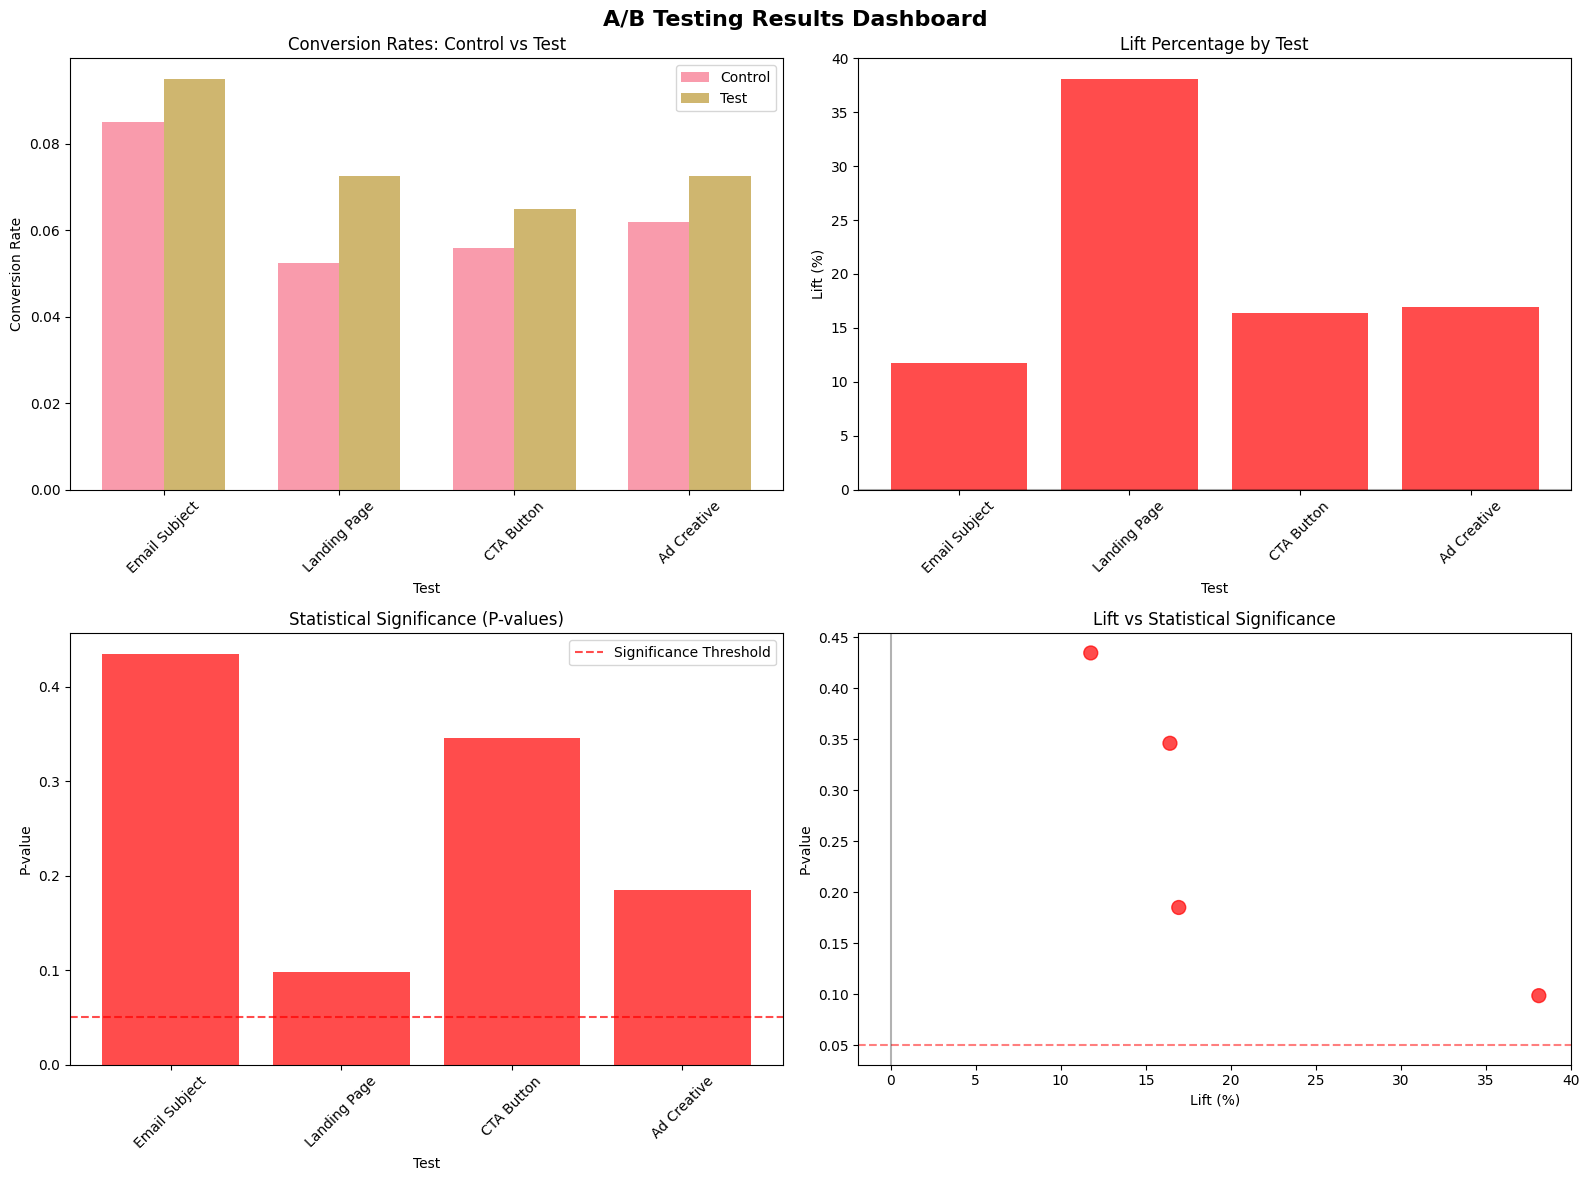

In [4]:
# ============================================================================
# 3. A/B TESTING VISUALIZATION
# ============================================================================

def ab_test_analysis(control_conversions, control_visitors, test_conversions, test_visitors, alpha=0.05):
    """Perform A/B test statistical analysis"""
    
    control_rate = control_conversions / control_visitors
    test_rate = test_conversions / test_visitors
    
    pooled_prob = (control_conversions + test_conversions) / (control_visitors + test_visitors)
    pooled_se = np.sqrt(pooled_prob * (1 - pooled_prob) * (1/control_visitors + 1/test_visitors))
    
    z_score = (test_rate - control_rate) / pooled_se
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    
    is_significant = p_value < alpha
    
    return {
        'control_rate': control_rate,
        'test_rate': test_rate,
        'lift': (test_rate - control_rate) / control_rate * 100,
        'z_score': z_score,
        'p_value': p_value,
        'is_significant': is_significant,
        'confidence_level': (1 - alpha) * 100
    }

# Multiple A/B tests for visualization
ab_tests = [
    {'name': 'Email Subject A vs B', 'control_conv': 85, 'control_vis': 1000, 'test_conv': 95, 'test_vis': 1000},
    {'name': 'Landing Page A vs B', 'control_conv': 42, 'control_vis': 800, 'test_conv': 58, 'test_vis': 800},
    {'name': 'CTA Button A vs B', 'control_conv': 67, 'control_vis': 1200, 'test_conv': 78, 'test_vis': 1200},
    {'name': 'Ad Creative A vs B', 'control_conv': 124, 'control_vis': 2000, 'test_conv': 145, 'test_vis': 2000}
]

ab_results_list = []
for test in ab_tests:
    result = ab_test_analysis(test['control_conv'], test['control_vis'], 
                             test['test_conv'], test['test_vis'])
    result['test_name'] = test['name']
    ab_results_list.append(result)

ab_results_df = pd.DataFrame(ab_results_list)

print(f"\n🧪 A/B Test Results:")
print(ab_results_df[['test_name', 'control_rate', 'test_rate', 'lift', 'p_value', 'is_significant']].round(4))

# Visualize A/B Test Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('A/B Testing Results Dashboard', fontsize=16, fontweight='bold')

# 1. Conversion Rates Comparison
x = np.arange(len(ab_results_df))
width = 0.35
axes[0, 0].bar(x - width/2, ab_results_df['control_rate'], width, label='Control', alpha=0.7)
axes[0, 0].bar(x + width/2, ab_results_df['test_rate'], width, label='Test', alpha=0.7)
axes[0, 0].set_title('Conversion Rates: Control vs Test')
axes[0, 0].set_xlabel('Test')
axes[0, 0].set_ylabel('Conversion Rate')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels([name.split(' A vs B')[0] for name in ab_results_df['test_name']], rotation=45)
axes[0, 0].legend()

# 2. Lift Percentage
colors = ['green' if sig else 'red' for sig in ab_results_df['is_significant']]
axes[0, 1].bar(range(len(ab_results_df)), ab_results_df['lift'], color=colors, alpha=0.7)
axes[0, 1].set_title('Lift Percentage by Test')
axes[0, 1].set_xlabel('Test')
axes[0, 1].set_ylabel('Lift (%)')
axes[0, 1].set_xticks(range(len(ab_results_df)))
axes[0, 1].set_xticklabels([name.split(' A vs B')[0] for name in ab_results_df['test_name']], rotation=45)
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 3. P-values
axes[1, 0].bar(range(len(ab_results_df)), ab_results_df['p_value'], color=colors, alpha=0.7)
axes[1, 0].set_title('Statistical Significance (P-values)')
axes[1, 0].set_xlabel('Test')
axes[1, 0].set_ylabel('P-value')
axes[1, 0].set_xticks(range(len(ab_results_df)))
axes[1, 0].set_xticklabels([name.split(' A vs B')[0] for name in ab_results_df['test_name']], rotation=45)
axes[1, 0].axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='Significance Threshold')
axes[1, 0].legend()

# 4. Statistical Power Visualization
axes[1, 1].scatter(ab_results_df['lift'], ab_results_df['p_value'], 
                   c=colors, s=100, alpha=0.7)
axes[1, 1].set_title('Lift vs Statistical Significance')
axes[1, 1].set_xlabel('Lift (%)')
axes[1, 1].set_ylabel('P-value')
axes[1, 1].axhline(y=0.05, color='red', linestyle='--', alpha=0.5)
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


👥 Customer Segmentation Results:
                   Count  Avg_Recency  Avg_Frequency  Avg_Monetary
Predicted_Segment                                                 
At Risk              512       113.12           6.89        652.73
Champions            186        14.76          28.13       4143.08
Loyal Customers      149        27.18          14.98       1925.75
New Customers        153        13.31           3.07        447.35


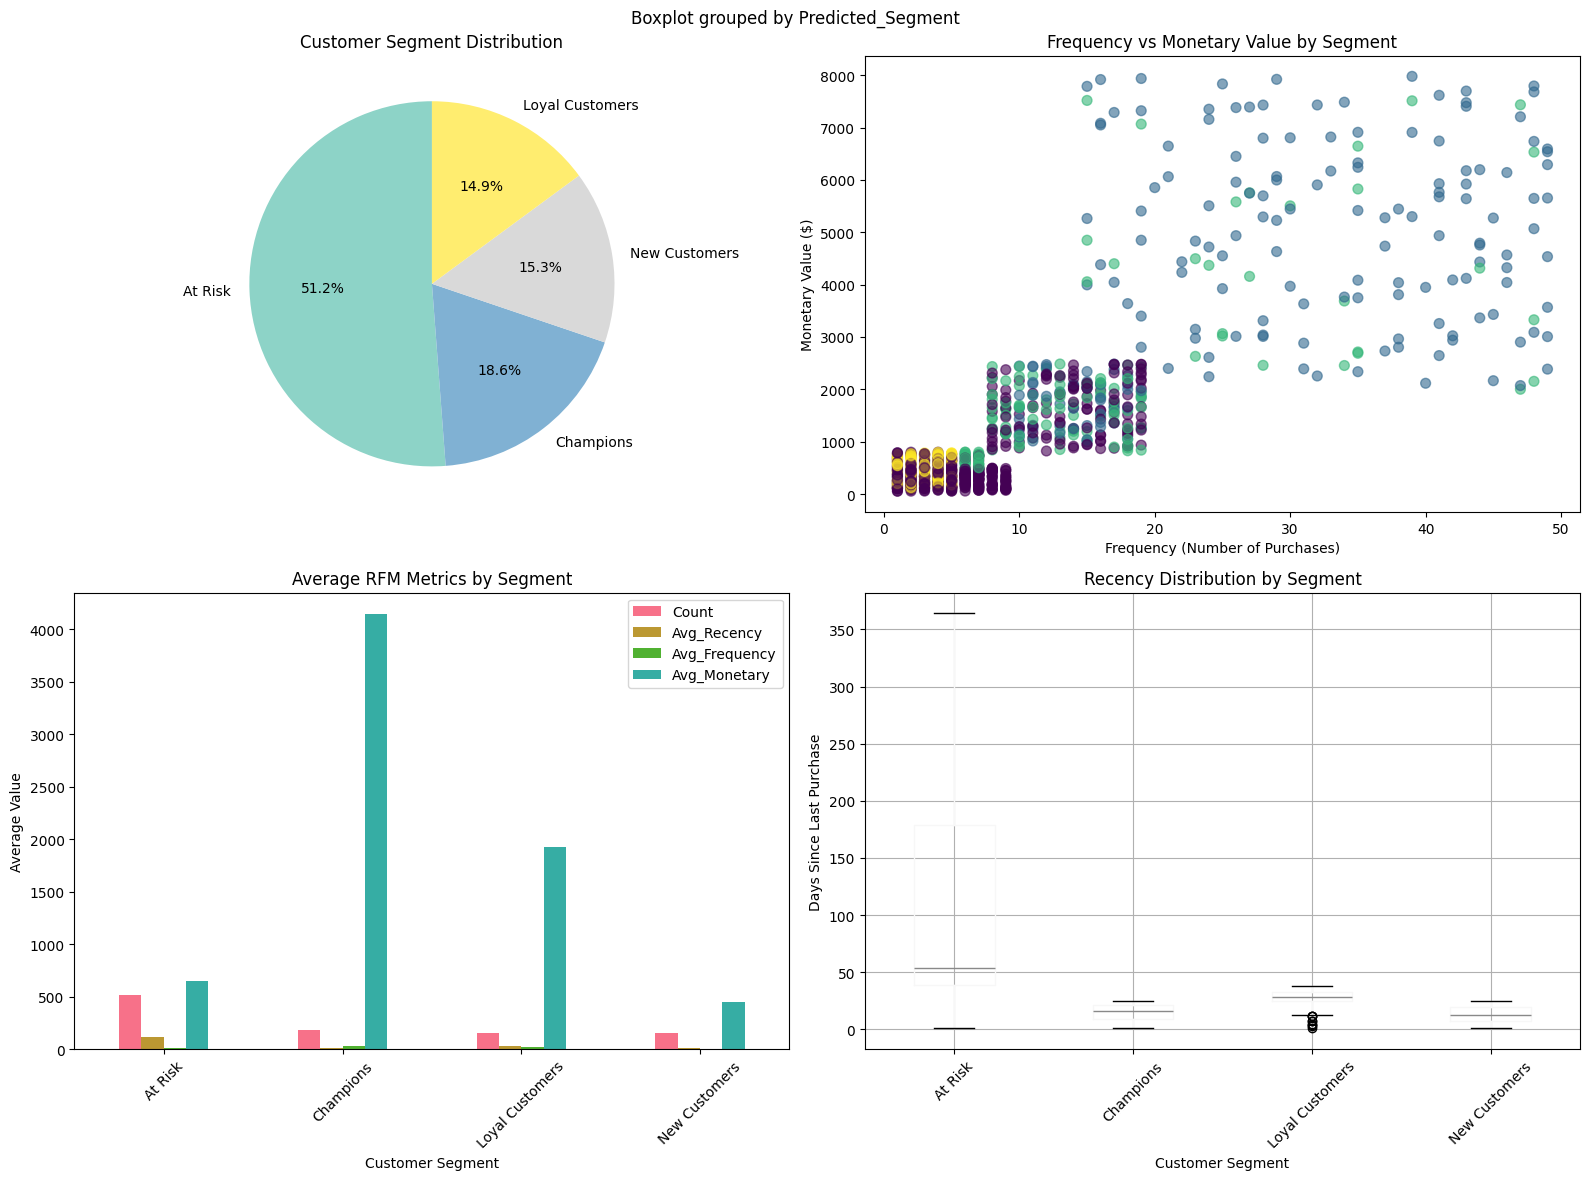

In [5]:
# ============================================================================
# 4. CUSTOMER SEGMENTATION WITH VISUALIZATIONS
# ============================================================================

def create_customer_data():
    """Generate sample customer data for segmentation"""
    np.random.seed(42)
    n_customers = 1000
    
    segments = ['Champions', 'Loyal Customers', 'New Customers', 'At Risk']
    segment_weights = [0.15, 0.25, 0.35, 0.25]
    
    customer_data = []
    for i in range(n_customers):
        segment = np.random.choice(segments, p=segment_weights)
        
        if segment == 'Champions':
            recency = np.random.randint(1, 30)
            frequency = np.random.randint(15, 50)
            monetary = np.random.randint(2000, 8000)
        elif segment == 'Loyal Customers':
            recency = np.random.randint(15, 60)
            frequency = np.random.randint(8, 20)
            monetary = np.random.randint(800, 2500)
        elif segment == 'New Customers':
            recency = np.random.randint(1, 45)
            frequency = np.random.randint(1, 8)
            monetary = np.random.randint(100, 800)
        else:  # At Risk
            recency = np.random.randint(60, 365)
            frequency = np.random.randint(1, 10)
            monetary = np.random.randint(50, 500)
        
        customer_data.append({
            'customer_id': f'cust_{i}',
            'recency': recency,
            'frequency': frequency,
            'monetary': monetary,
            'true_segment': segment
        })
    
    return pd.DataFrame(customer_data)

def rfm_segmentation(df):
    """Perform RFM segmentation"""
    # Create RFM scores
    df['R_Score'] = pd.qcut(df['recency'].rank(method='first'), 5, labels=[5,4,3,2,1])
    df['F_Score'] = pd.qcut(df['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
    df['M_Score'] = pd.qcut(df['monetary'].rank(method='first'), 5, labels=[1,2,3,4,5])
    
    df['R_Score'] = df['R_Score'].astype(int)
    df['F_Score'] = df['F_Score'].astype(int)
    df['M_Score'] = df['M_Score'].astype(int)
    
    # Simplified segmentation logic
    def segment_customers(row):
        if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
            return 'Champions'
        elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
            return 'Loyal Customers'
        elif row['R_Score'] >= 4 and row['F_Score'] <= 2:
            return 'New Customers'
        else:
            return 'At Risk'
    
    df['Predicted_Segment'] = df.apply(segment_customers, axis=1)
    return df

customer_df = create_customer_data()
segmented_df = rfm_segmentation(customer_df)

print(f"\n👥 Customer Segmentation Results:")
segment_summary = segmented_df.groupby('Predicted_Segment').agg({
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).round(2)
segment_summary.columns = ['Count', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary']
print(segment_summary)

# Visualize Customer Segmentation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation Analysis', fontsize=16, fontweight='bold')

# 1. Segment Distribution
segment_counts = segmented_df['Predicted_Segment'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(segment_counts)))
axes[0, 0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 0].set_title('Customer Segment Distribution')

# 2. RFM Scatter Plot
scatter = axes[0, 1].scatter(segmented_df['frequency'], segmented_df['monetary'], 
                            c=pd.Categorical(segmented_df['Predicted_Segment']).codes, 
                            alpha=0.6, s=50)
axes[0, 1].set_title('Frequency vs Monetary Value by Segment')
axes[0, 1].set_xlabel('Frequency (Number of Purchases)')
axes[0, 1].set_ylabel('Monetary Value ($)')

# 3. Average Metrics by Segment
segment_summary.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average RFM Metrics by Segment')
axes[1, 0].set_xlabel('Customer Segment')
axes[1, 0].set_ylabel('Average Value')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend()

# 4. Recency Distribution by Segment
segmented_df.boxplot(column='recency', by='Predicted_Segment', ax=axes[1, 1])
axes[1, 1].set_title('Recency Distribution by Segment')
axes[1, 1].set_xlabel('Customer Segment')
axes[1, 1].set_ylabel('Days Since Last Purchase')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [6]:
# ============================================================================
# 5. PREDICTIVE MODELING WITH VISUALIZATIONS
# ============================================================================

def create_customer_behavior_data():
    """Create comprehensive customer behavior dataset"""
    np.random.seed(42)
    n_customers = 2000
    
    behavior_data = []
    for i in range(n_customers):
        age = np.random.randint(18, 70)
        tenure_days = np.random.randint(30, 1000)
        total_purchases = np.random.poisson(10)
        avg_order_value = np.random.normal(100, 50)
        days_since_last_purchase = np.random.randint(1, 180)
        email_opens = np.random.poisson(5)
        website_visits = np.random.poisson(15)
        support_tickets = np.random.poisson(1)
        
        # Calculate probabilities
        purchase_prob = (
            0.3 * (1 / (1 + days_since_last_purchase / 30)) +
            0.2 * min(total_purchases / 20, 1) +
            0.2 * min(avg_order_value / 200, 1) +
            0.1 * min(email_opens / 10, 1) +
            0.1 * min(website_visits / 30, 1) +
            0.1 * (1 - min(support_tickets / 5, 1))
        )
        
        will_purchase = np.random.random() < purchase_prob
        
        behavior_data.append({
            'customer_id': f'cust_{i}',
            'age': age,
            'tenure_days': tenure_days,
            'total_purchases': total_purchases,
            'avg_order_value': max(avg_order_value, 10),
            'days_since_last_purchase': days_since_last_purchase,
            'email_opens': email_opens,
            'website_visits': website_visits,
            'support_tickets': support_tickets,
            'will_purchase_next_30_days': will_purchase
        })
    
    return pd.DataFrame(behavior_data)

behavior_df = create_customer_behavior_data()


🚨 Churn Prediction Model Results:
Accuracy: 0.573
Precision: 0.561
Recall: 0.505
ROC AUC: 0.578


KeyError: 'predictions'

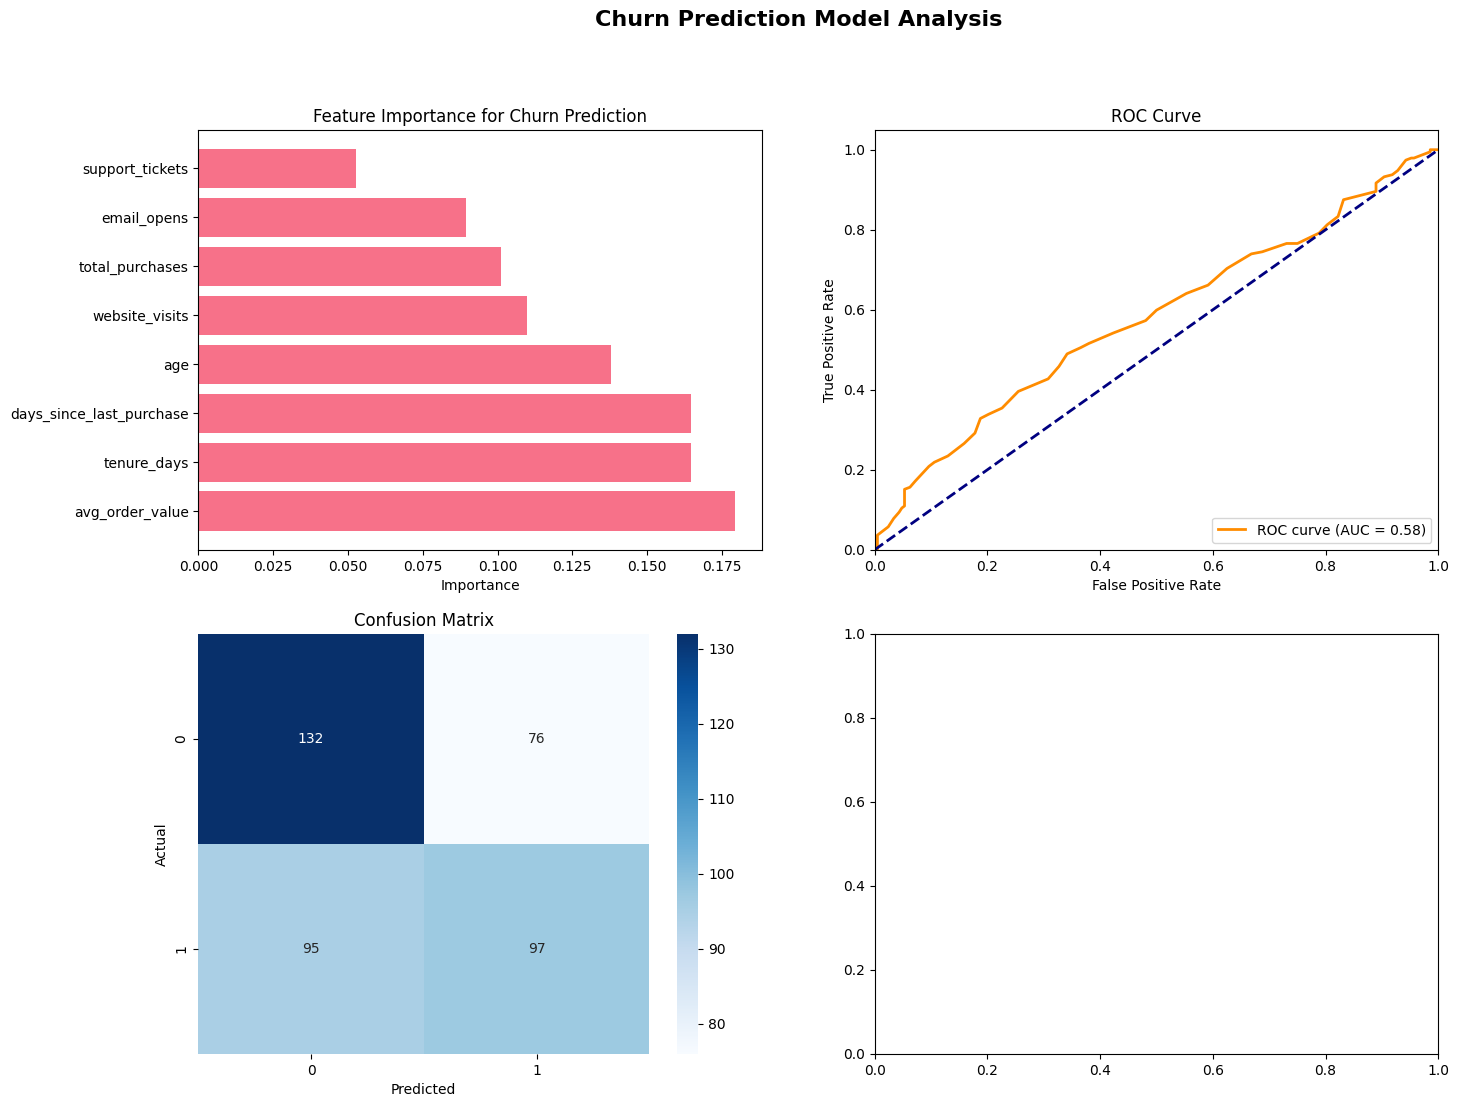

In [14]:
# ============================================================================
# 6. CHURN PREDICTION MODEL WITH VISUALIZATIONS
# ============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score, recall_score


def build_churn_model(df):
    # Features and target
    X = df.drop(columns=["customer_id", "will_purchase_next_30_days"])
    y = df["will_purchase_next_30_days"]

    # Save feature names for feature importance later
    feature_columns = X.columns.tolist()

    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = rf_model.predict(X_test_scaled)

    # Probabilities (handle single-class edge case)
    y_pred_proba = rf_model.predict_proba(X_test_scaled)
    if y_pred_proba.shape[1] > 1:
        y_pred_proba = y_pred_proba[:, 1]
    else:
        y_pred_proba = y_pred_proba[:, 0]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Feature importance
    feature_importance = pd.DataFrame({
        "feature": feature_columns,
        "importance": rf_model.feature_importances_,
    }).sort_values("importance", ascending=False)

    return {
        "model": rf_model,
        "scaler": scaler,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc,
        "fpr": fpr,
        "tpr": tpr,
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "feature_importance": feature_importance,
    }


churn_results = build_churn_model(behavior_df)

print(f"\n🚨 Churn Prediction Model Results:")
print(f"Accuracy: {churn_results['accuracy']:.3f}")
print(f"Precision: {churn_results['precision']:.3f}")
print(f"Recall: {churn_results['recall']:.3f}")
print(f"ROC AUC: {churn_results['roc_auc']:.3f}")

# Visualize Churn Prediction Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Churn Prediction Model Analysis', fontsize=16, fontweight='bold')

# 1. Feature Importance
axes[0, 0].barh(churn_results['feature_importance']['feature'], 
                churn_results['feature_importance']['importance'])
axes[0, 0].set_title('Feature Importance for Churn Prediction')
axes[0, 0].set_xlabel('Importance')

# 2. ROC Curve
axes[0, 1].plot(churn_results['fpr'], churn_results['tpr'], 
                color='darkorange', lw=2, label=f'ROC curve (AUC = {churn_results["roc_auc"]:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend(loc="lower right")

# 3. Confusion Matrix
sns.heatmap(churn_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# 4. Prediction Distribution
axes[1, 1].hist(churn_results['predictions'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Churn Probability Distribution')
axes[1, 1].set_xlabel('Churn Probability')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# 7. CUSTOMER LIFETIME VALUE PREDICTION WITH VISUALIZATIONS
# ============================================================================

def build_ltv_model(df):
    """Build LTV prediction model with visualizations"""
    # Calculate LTV
    df['ltv'] = (df['total_purchases'] * df['avg_order_value'] * 
                (df['tenure_days'] / 365))
    
    feature_columns = ['age', 'tenure_days', 'total_purchases', 'avg_order_value', 
                      'email_opens', 'website_visits', 'days_since_last_purchase']
    
    X = df[feature_columns]
    y = df['ltv']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = rf_model.predict(X_test_scaled)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return {
        'model': rf_model,
        'scaler': scaler,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'feature_importance': feature_importance,
        'predictions': y_pred,
        'y_test': y_test,
        'y_pred': y_pred
    }

ltv_results = build_ltv_model(behavior_df)

print(f"\n💰 Customer Lifetime Value Prediction Model Results:")
print(f"R² Score: {ltv_results['r2']:.3f}")
print(f"RMSE: ${ltv_results['rmse']:.2f}")

# Visualize LTV Prediction Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Lifetime Value Prediction Analysis', fontsize=16, fontweight='bold')

# 1. Feature Importance
axes[0, 0].barh(ltv_results['feature_importance']['feature'], 
                ltv_results['feature_importance']['importance'], color='lightgreen')
axes[0, 0].set_title('Feature Importance for LTV Prediction')
axes[0, 0].set_xlabel('Importance')

# 2. Actual vs Predicted LTV
axes[0, 1].scatter(ltv_results['y_test'], ltv_results['y_pred'], alpha=0.6)
axes[0, 1].plot([ltv_results['y_test'].min(), ltv_results['y_test'].max()], 
                [ltv_results['y_test'].min(), ltv_results['y_test'].max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual LTV')
axes[0, 1].set_ylabel('Predicted LTV')
axes[0, 1].set_title(f'Actual vs Predicted LTV (R² = {ltv_results["r2"]:.3f})')

# 3. LTV Distribution
axes[1, 0].hist(behavior_df['ltv'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Customer Lifetime Value Distribution')
axes[1, 0].set_xlabel('LTV ($)')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].axvline(behavior_df['ltv'].mean(), color='red', linestyle='--', 
                   label=f'Mean LTV: ${behavior_df["ltv"].mean():.2f}')
axes[1, 0].legend()

# 4. Residuals Plot
residuals = ltv_results['y_test'] - ltv_results['y_pred']
axes[1, 1].scatter(ltv_results['y_pred'], residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Predicted LTV')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()


🛍️ Next Purchase Prediction Model Results:
Accuracy: 0.545
Precision: 0.538
Recall: 0.472
ROC AUC: 0.560


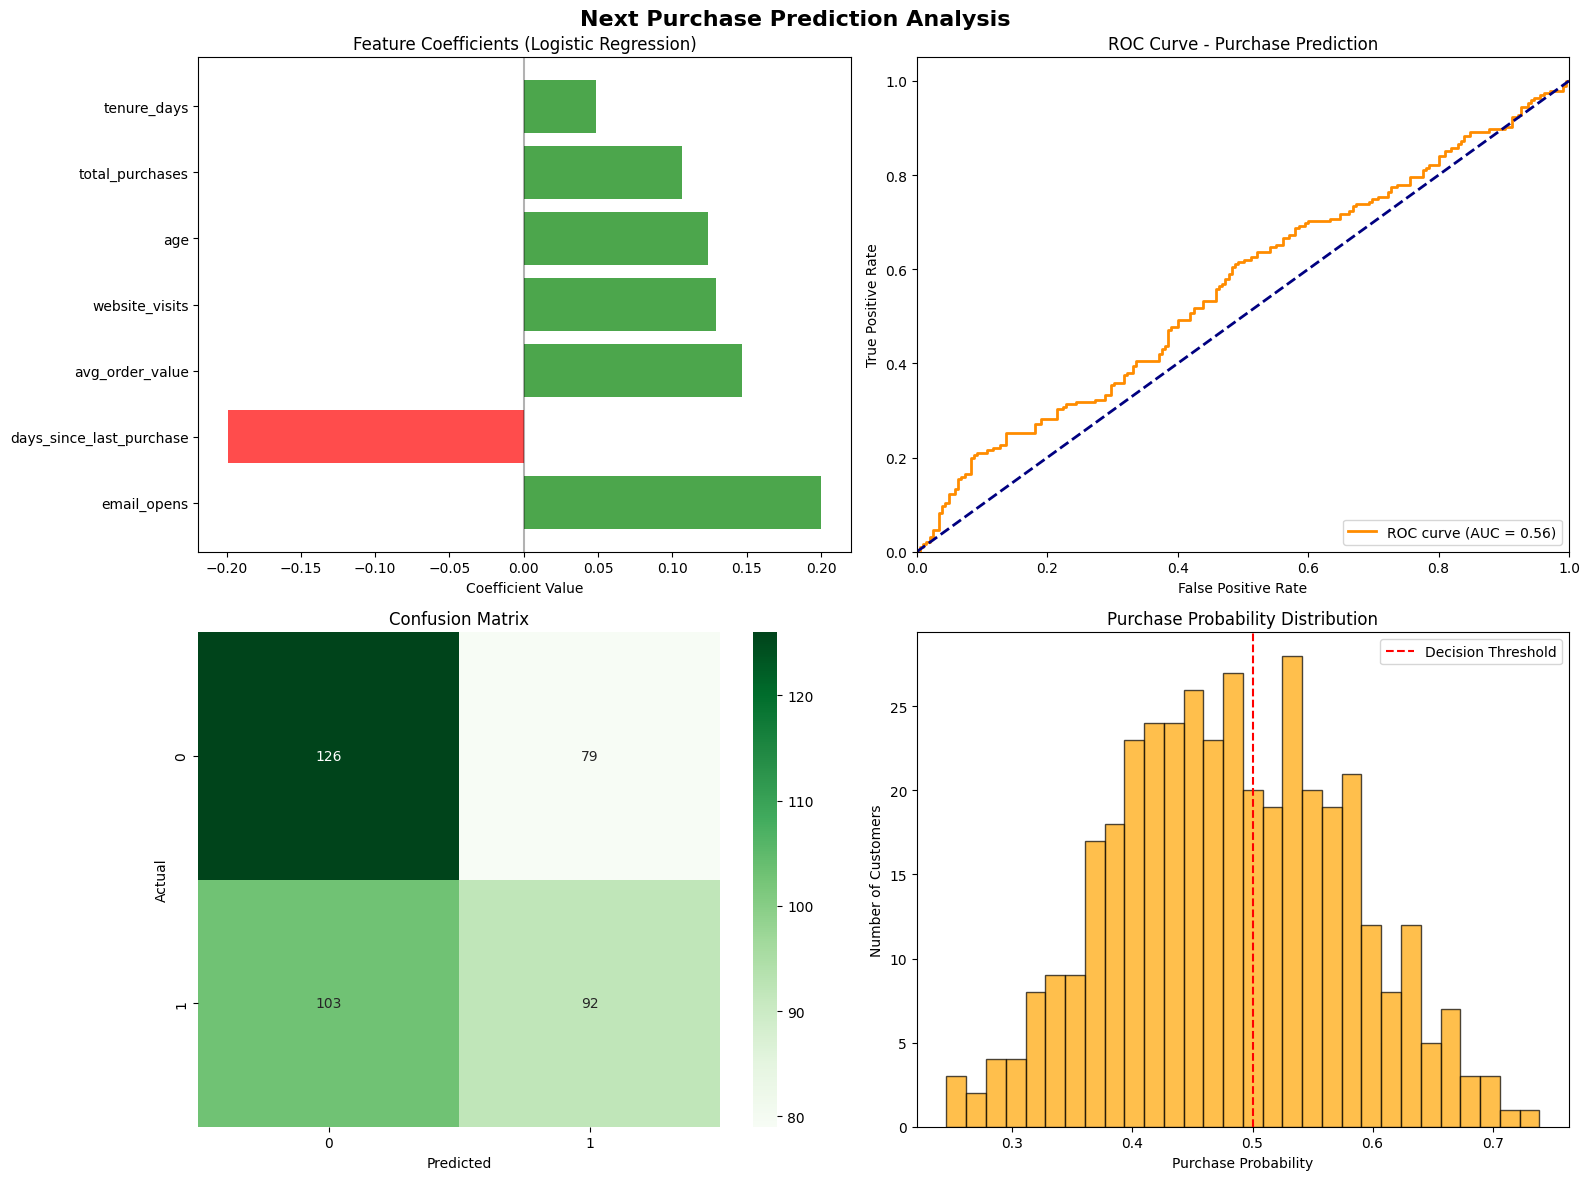

In [15]:
# ============================================================================
# 8. NEXT PURCHASE PREDICTION WITH VISUALIZATIONS
# ============================================================================

def build_purchase_prediction_model(df):
    """Build next purchase prediction model"""
    feature_columns = ['age', 'tenure_days', 'total_purchases', 'avg_order_value', 
                      'days_since_last_purchase', 'email_opens', 'website_visits']
    
    X = df[feature_columns]
    y = df['will_purchase_next_30_days']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = lr_model.predict(X_test_scaled)
    y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Feature coefficients
    feature_coef = pd.DataFrame({
        'feature': feature_columns,
        'coefficient': lr_model.coef_[0]
    }).sort_values('coefficient', key=abs, ascending=False)
    
    return {
        'model': lr_model,
        'scaler': scaler,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'predictions': y_pred_proba,
        'y_test': y_test,
        'y_pred': y_pred,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'feature_coef': feature_coef,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

purchase_results = build_purchase_prediction_model(behavior_df)

print(f"\n🛍️ Next Purchase Prediction Model Results:")
print(f"Accuracy: {purchase_results['accuracy']:.3f}")
print(f"Precision: {purchase_results['precision']:.3f}")
print(f"Recall: {purchase_results['recall']:.3f}")
print(f"ROC AUC: {purchase_results['roc_auc']:.3f}")

# Visualize Purchase Prediction Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Next Purchase Prediction Analysis', fontsize=16, fontweight='bold')

# 1. Feature Coefficients
colors = ['red' if x < 0 else 'green' for x in purchase_results['feature_coef']['coefficient']]
axes[0, 0].barh(purchase_results['feature_coef']['feature'], 
                purchase_results['feature_coef']['coefficient'], color=colors, alpha=0.7)
axes[0, 0].set_title('Feature Coefficients (Logistic Regression)')
axes[0, 0].set_xlabel('Coefficient Value')
axes[0, 0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# 2. ROC Curve
axes[0, 1].plot(purchase_results['fpr'], purchase_results['tpr'], 
                color='darkorange', lw=2, label=f'ROC curve (AUC = {purchase_results["roc_auc"]:.2f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - Purchase Prediction')
axes[0, 1].legend(loc="lower right")

# 3. Confusion Matrix
sns.heatmap(purchase_results['confusion_matrix'], annot=True, fmt='d', cmap='Greens', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# 4. Purchase Probability Distribution
axes[1, 1].hist(purchase_results['predictions'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_title('Purchase Probability Distribution')
axes[1, 1].set_xlabel('Purchase Probability')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].axvline(x=0.5, color='red', linestyle='--', label='Decision Threshold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


📺 Marketing Mix Modeling Results:
Model R² Score: 0.023

Channel ROAS Analysis:
         channel  roas  total_spend  total_contribution
0       tv_spend  0.12    365655.73            43987.16
1  digital_spend  0.37    292120.21           107595.14
2    print_spend  0.55    110353.71            60884.29
3    radio_spend -0.35    148204.08           -51375.76


ValueError: Wedge sizes 'x' must be non negative values

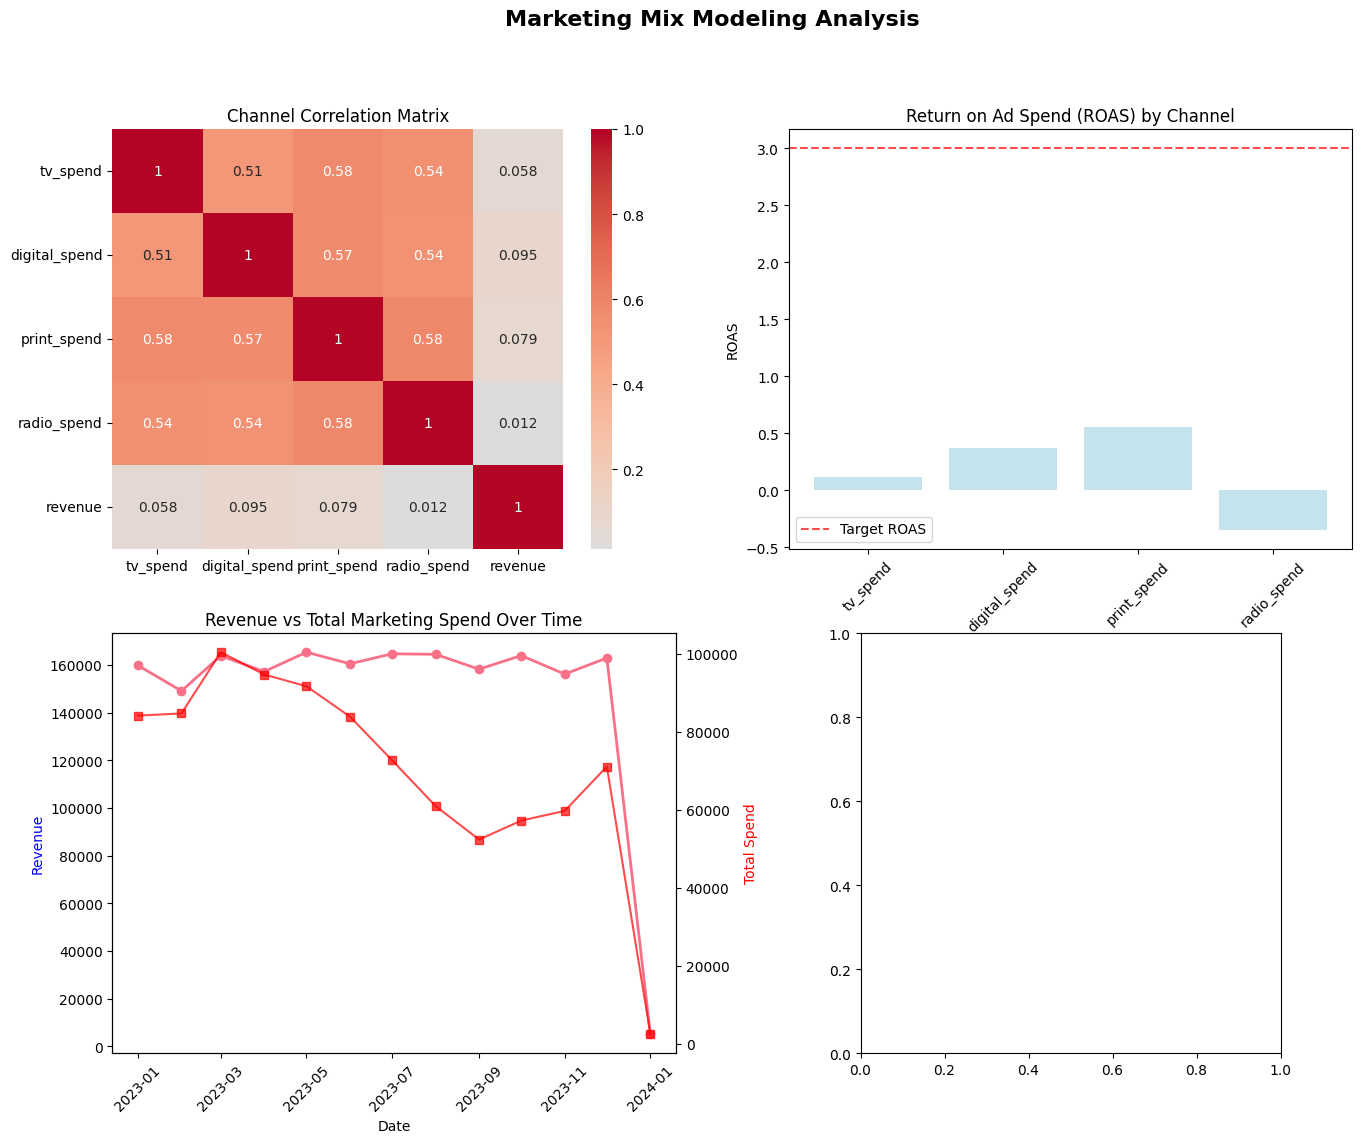

In [16]:
# ============================================================================
# 9. MARKETING MIX MODELING WITH VISUALIZATIONS
# ============================================================================

def marketing_mix_analysis():
    """Marketing mix modeling with advanced visualizations"""
    np.random.seed(42)
    dates = pd.date_range('2023-01-01', '2024-01-01', freq='D')
    
    mix_data = []
    for date in dates:
        day_of_year = date.timetuple().tm_yday
        seasonal_factor = 1 + 0.3 * np.sin(2 * np.pi * day_of_year / 365)
        
        tv_spend = np.random.normal(1000, 200) * seasonal_factor
        digital_spend = np.random.normal(800, 150) * seasonal_factor
        print_spend = np.random.normal(300, 50) * seasonal_factor
        radio_spend = np.random.normal(400, 80) * seasonal_factor
        
        # Revenue with diminishing returns and interaction effects
        base_revenue = 5000
        tv_contribution = 2.5 * np.sqrt(max(tv_spend, 0))
        digital_contribution = 3.2 * np.sqrt(max(digital_spend, 0))
        print_contribution = 1.8 * np.sqrt(max(print_spend, 0))
        radio_contribution = 2.0 * np.sqrt(max(radio_spend, 0))
        
        # Add interaction effect between TV and Digital
        interaction_effect = 0.1 * np.sqrt(max(tv_spend, 0)) * np.sqrt(max(digital_spend, 0)) / 100
        
        total_revenue = (base_revenue + tv_contribution + digital_contribution + 
                        print_contribution + radio_contribution + interaction_effect +
                        np.random.normal(0, 300))
        
        mix_data.append({
            'date': date,
            'tv_spend': max(tv_spend, 0),
            'digital_spend': max(digital_spend, 0),
            'print_spend': max(print_spend, 0),
            'radio_spend': max(radio_spend, 0),
            'revenue': max(total_revenue, 0),
            'day_of_week': date.dayofweek,
            'month': date.month
        })
    
    return pd.DataFrame(mix_data)

def analyze_marketing_mix(df):
    """Comprehensive marketing mix analysis"""
    spend_columns = ['tv_spend', 'digital_spend', 'print_spend', 'radio_spend']
    
    # Calculate correlation matrix
    correlation_matrix = df[spend_columns + ['revenue']].corr()
    
    # Build attribution model with transformed variables
    X = df[spend_columns]
    y = df['revenue']
    
    # Apply diminishing returns transformation
    X_transformed = np.sqrt(X)
    
    # Add time-based features
    X_enhanced = X_transformed.copy()
    X_enhanced['day_of_week'] = df['day_of_week']
    X_enhanced['month'] = df['month']
    
    # Fit model
    model = LinearRegression()
    model.fit(X_enhanced, y)
    
    # Calculate individual channel contributions
    contributions = {}
    for i, channel in enumerate(spend_columns):
        contributions[channel] = model.coef_[i]
    
    coefficients = pd.DataFrame({
        'channel': spend_columns,
        'coefficient': [contributions[ch] for ch in spend_columns],
        'contribution_per_sqrt_dollar': [contributions[ch] for ch in spend_columns]
    })
    
    # Calculate ROAS for each channel
    total_contribution = {}
    for channel in spend_columns:
        channel_contribution = model.coef_[spend_columns.index(channel)] * np.sqrt(df[channel])
        total_contribution[channel] = channel_contribution.sum()
    
    roas_data = []
    for channel in spend_columns:
        total_spend = df[channel].sum()
        total_revenue_contribution = total_contribution[channel]
        roas = total_revenue_contribution / total_spend if total_spend > 0 else 0
        roas_data.append({'channel': channel, 'roas': roas, 'total_spend': total_spend, 
                         'total_contribution': total_revenue_contribution})
    
    roas_df = pd.DataFrame(roas_data)
    
    return {
        'correlation_matrix': correlation_matrix,
        'model': model,
        'coefficients': coefficients,
        'r2_score': model.score(X_enhanced, y),
        'roas_analysis': roas_df,
        'predictions': model.predict(X_enhanced)
    }

# Perform marketing mix analysis
mix_df = marketing_mix_analysis()
mix_results = analyze_marketing_mix(mix_df)

print(f"\n📺 Marketing Mix Modeling Results:")
print(f"Model R² Score: {mix_results['r2_score']:.3f}")
print(f"\nChannel ROAS Analysis:")
print(mix_results['roas_analysis'].round(2))

# Visualize Marketing Mix Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Marketing Mix Modeling Analysis', fontsize=16, fontweight='bold')

# 1. Correlation Heatmap
sns.heatmap(mix_results['correlation_matrix'], annot=True, cmap='coolwarm', center=0, ax=axes[0, 0])
axes[0, 0].set_title('Channel Correlation Matrix')

# 2. Channel ROAS Comparison
axes[0, 1].bar(mix_results['roas_analysis']['channel'], mix_results['roas_analysis']['roas'], 
               color='lightblue', alpha=0.7)
axes[0, 1].set_title('Return on Ad Spend (ROAS) by Channel')
axes[0, 1].set_ylabel('ROAS')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=3, color='red', linestyle='--', alpha=0.7, label='Target ROAS')
axes[0, 1].legend()

# 3. Spend vs Revenue Over Time (Monthly aggregation)
monthly_data = mix_df.groupby(mix_df['date'].dt.to_period('M')).agg({
    'tv_spend': 'sum', 'digital_spend': 'sum', 'print_spend': 'sum', 
    'radio_spend': 'sum', 'revenue': 'sum'
}).reset_index()
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

axes[1, 0].plot(monthly_data['date'], monthly_data['revenue'], marker='o', linewidth=2, label='Revenue')
axes2 = axes[1, 0].twinx()
total_spend = monthly_data[['tv_spend', 'digital_spend', 'print_spend', 'radio_spend']].sum(axis=1)
axes2.plot(monthly_data['date'], total_spend, marker='s', color='red', alpha=0.7, label='Total Spend')
axes[1, 0].set_title('Revenue vs Total Marketing Spend Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Revenue', color='blue')
axes2.set_ylabel('Total Spend', color='red')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Channel Contribution Pie Chart
channel_contributions = mix_results['roas_analysis']['total_contribution']
axes[1, 1].pie(channel_contributions, labels=mix_results['roas_analysis']['channel'], 
               autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Revenue Contribution by Channel')

plt.tight_layout()
plt.show()


🎯 Campaign Performance Analysis:
                  impressions  clicks  conversions  spend        revenue  \
campaign                                                                   
Back to School         298035   12658          835  55802  120504.323771   
Holiday Campaign       259352    6608          477  44242   96440.491239   
New Year Promo         350024   11659          826  63130  146292.365542   
Spring Sale 2024       256415    7655          347  54201   50625.324034   
Summer Launch          311988    8988          325  42114   42911.943849   

                  Total_CTR  Total_Conversion_Rate  Total_ROAS     ROI  
campaign                                                                
Back to School         4.25                   6.60        2.16  115.95  
Holiday Campaign       2.55                   7.22        2.18  117.98  
New Year Promo         3.33                   7.08        2.32  131.73  
Spring Sale 2024       2.99                   4.53        0.93   -6.

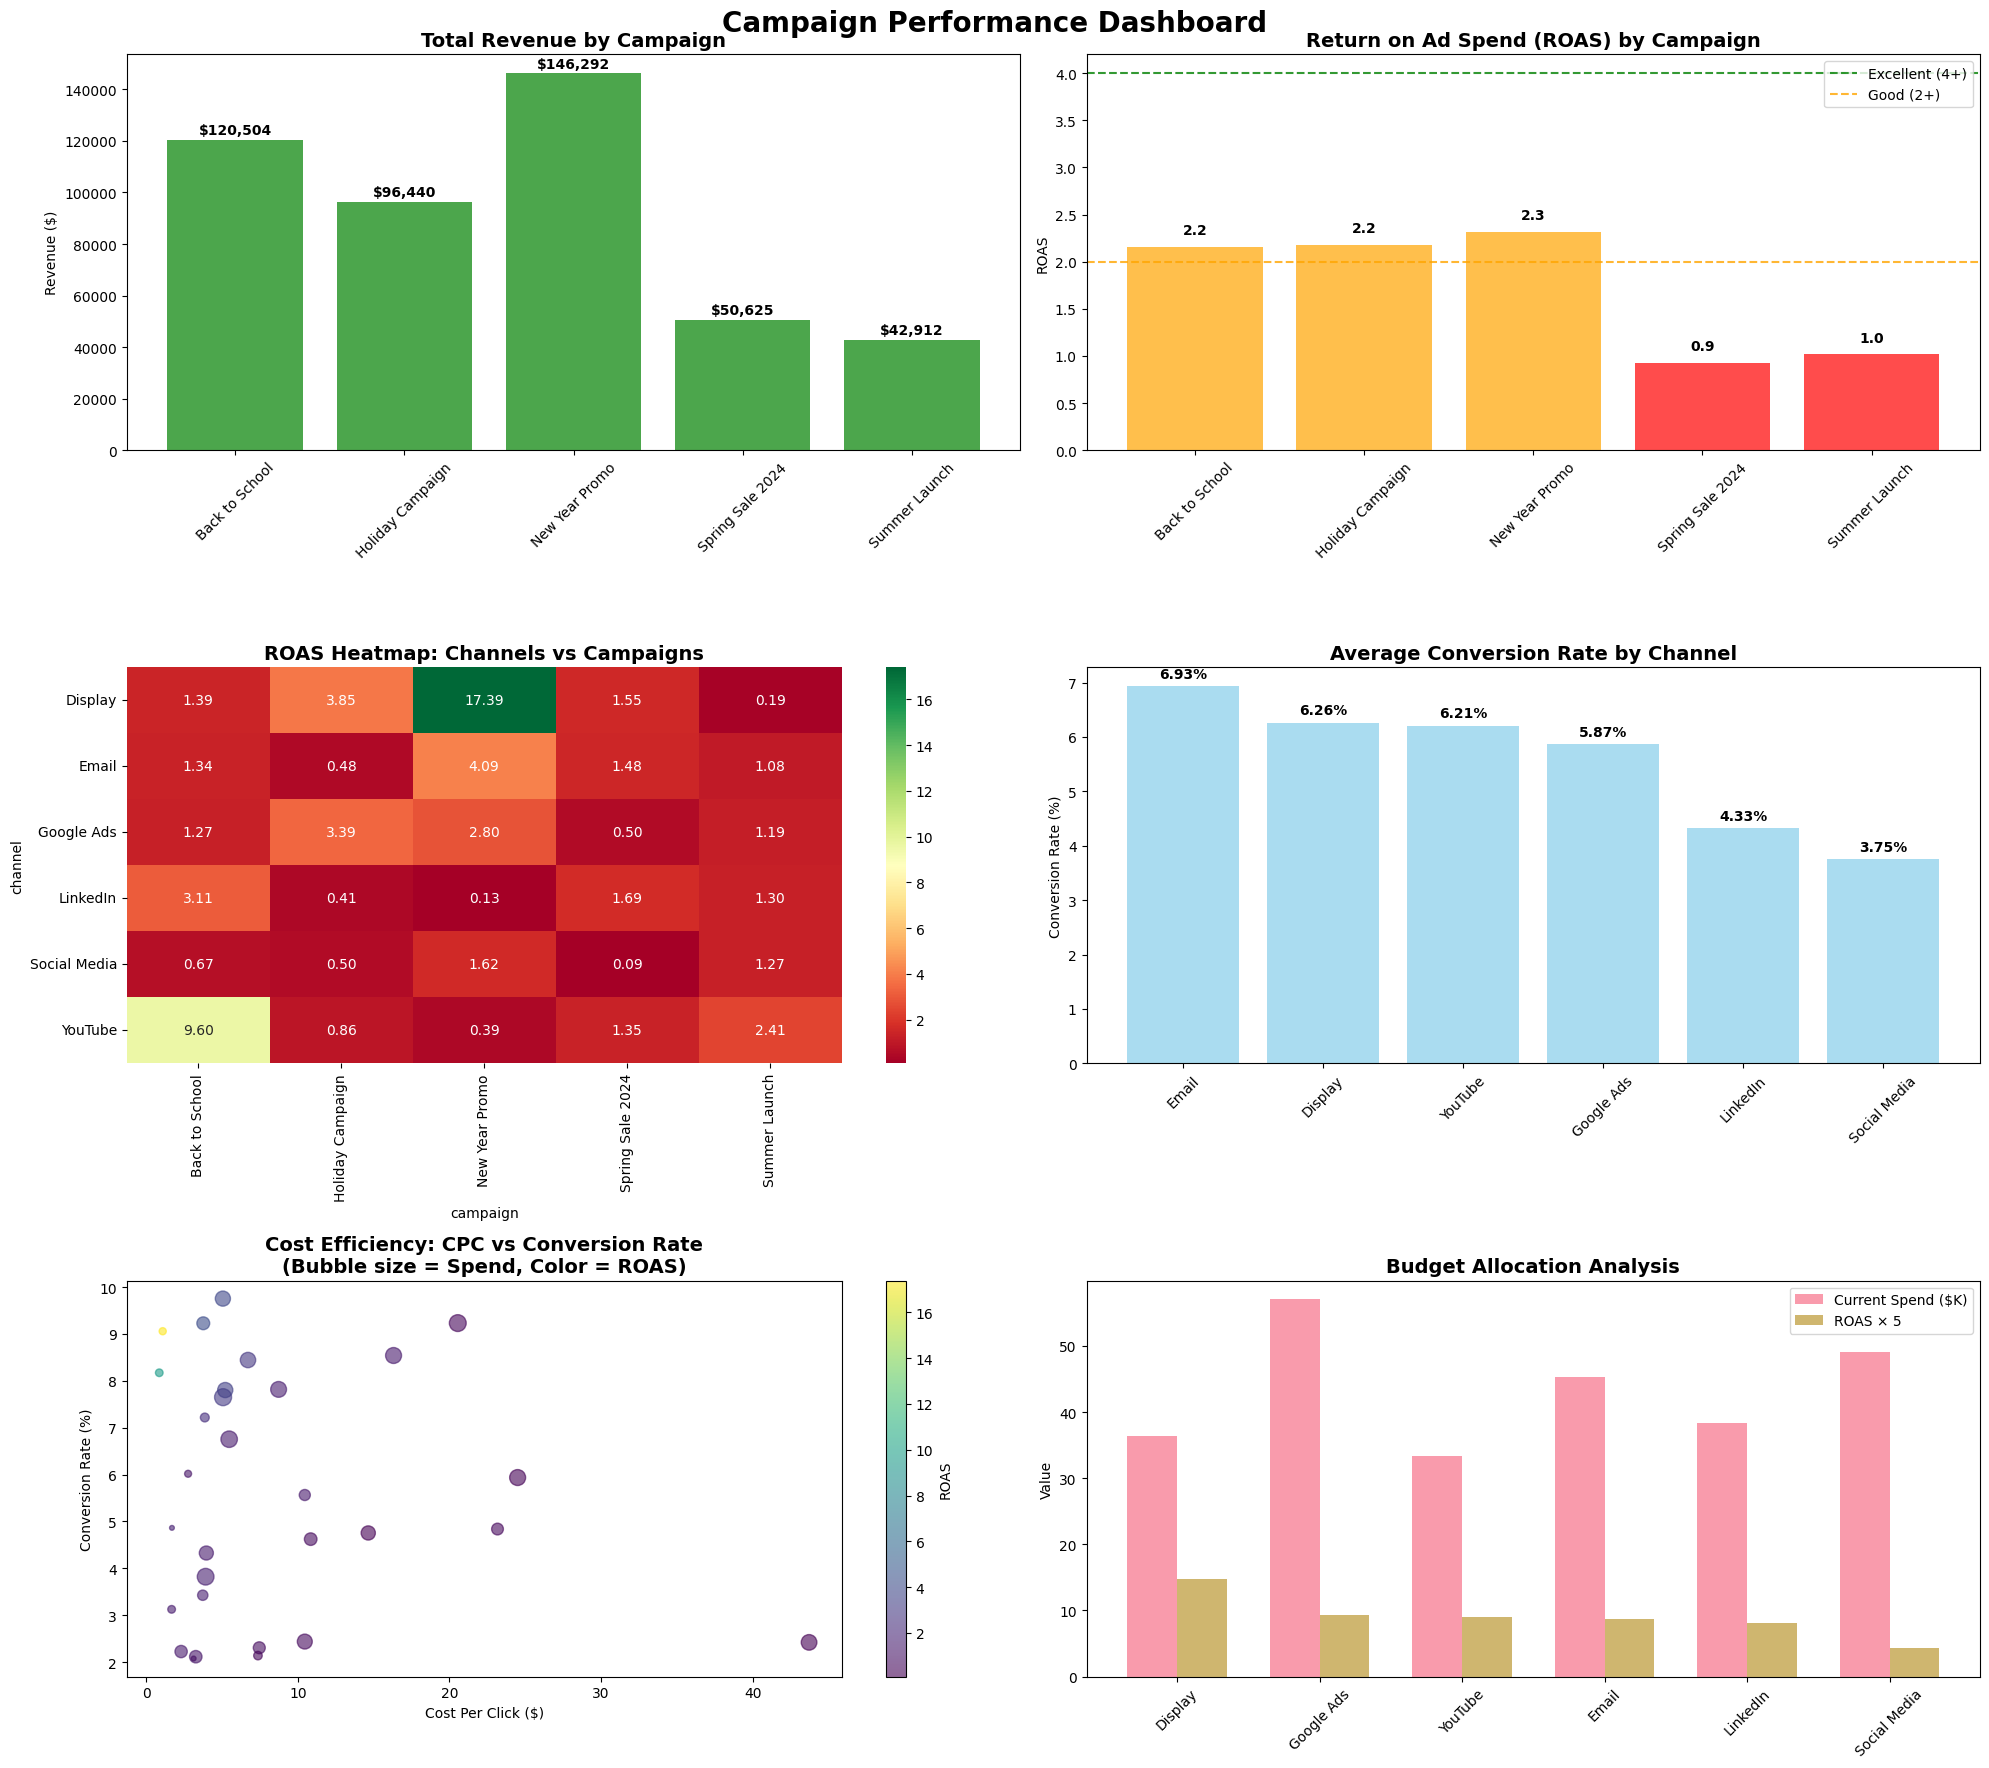

In [17]:
# ============================================================================
# 10. COMPREHENSIVE CAMPAIGN PERFORMANCE DASHBOARD
# ============================================================================

def generate_campaign_performance_data():
    """Generate comprehensive campaign performance data"""
    np.random.seed(42)
    campaigns = ['Spring Sale 2024', 'Summer Launch', 'Back to School', 'Holiday Campaign', 'New Year Promo']
    channels = ['Email', 'Social Media', 'Google Ads', 'Display', 'YouTube', 'LinkedIn']
    
    campaign_data = []
    for campaign in campaigns:
        for channel in channels:
            impressions = np.random.randint(10000, 100000)
            clicks = int(impressions * np.random.uniform(0.01, 0.06))
            conversions = int(clicks * np.random.uniform(0.02, 0.10))
            spend = np.random.randint(1000, 15000)
            revenue = conversions * np.random.uniform(40, 250)
            
            campaign_data.append({
                'campaign': campaign,
                'channel': channel,
                'impressions': impressions,
                'clicks': clicks,
                'conversions': conversions,
                'spend': spend,
                'revenue': revenue,
                'ctr': (clicks / impressions) * 100,
                'conversion_rate': (conversions / clicks) * 100 if clicks > 0 else 0,
                'cpc': spend / clicks if clicks > 0 else 0,
                'cpa': spend / conversions if conversions > 0 else 0,
                'roas': revenue / spend if spend > 0 else 0
            })
    
    return pd.DataFrame(campaign_data)

campaign_df = generate_campaign_performance_data()

print(f"\n🎯 Campaign Performance Analysis:")
# Overall performance summary
performance_summary = campaign_df.groupby('campaign').agg({
    'impressions': 'sum',
    'clicks': 'sum', 
    'conversions': 'sum',
    'spend': 'sum',
    'revenue': 'sum'
})

performance_summary['Total_CTR'] = (performance_summary['clicks'] / performance_summary['impressions'] * 100).round(2)
performance_summary['Total_Conversion_Rate'] = (performance_summary['conversions'] / performance_summary['clicks'] * 100).round(2)
performance_summary['Total_ROAS'] = (performance_summary['revenue'] / performance_summary['spend']).round(2)
performance_summary['ROI'] = ((performance_summary['revenue'] - performance_summary['spend']) / performance_summary['spend'] * 100).round(2)

print(performance_summary)

# Comprehensive Campaign Performance Dashboard
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('Campaign Performance Dashboard', fontsize=20, fontweight='bold')

# 1. Revenue by Campaign
axes[0, 0].bar(performance_summary.index, performance_summary['revenue'], color='green', alpha=0.7)
axes[0, 0].set_title('Total Revenue by Campaign', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Revenue ($)')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(performance_summary['revenue']):
    axes[0, 0].text(i, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# 2. ROAS by Campaign
colors_roas = ['green' if x > 4 else 'orange' if x > 2 else 'red' for x in performance_summary['Total_ROAS']]
axes[0, 1].bar(performance_summary.index, performance_summary['Total_ROAS'], color=colors_roas, alpha=0.7)
axes[0, 1].set_title('Return on Ad Spend (ROAS) by Campaign', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('ROAS')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].axhline(y=4, color='green', linestyle='--', alpha=0.8, label='Excellent (4+)')
axes[0, 1].axhline(y=2, color='orange', linestyle='--', alpha=0.8, label='Good (2+)')
axes[0, 1].legend()
for i, v in enumerate(performance_summary['Total_ROAS']):
    axes[0, 1].text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Channel Performance Heatmap
channel_performance = campaign_df.pivot_table(index='channel', columns='campaign', values='roas', aggfunc='mean')
sns.heatmap(channel_performance, annot=True, fmt='.2f', cmap='RdYlGn', ax=axes[1, 0])
axes[1, 0].set_title('ROAS Heatmap: Channels vs Campaigns', fontsize=14, fontweight='bold')

# 4. Conversion Rate by Channel
channel_conv_rate = campaign_df.groupby('channel')['conversion_rate'].mean().sort_values(ascending=False)
axes[1, 1].bar(channel_conv_rate.index, channel_conv_rate.values, color='skyblue', alpha=0.7)
axes[1, 1].set_title('Average Conversion Rate by Channel', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Conversion Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(channel_conv_rate.values):
    axes[1, 1].text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

# 5. Cost Efficiency Analysis
axes[2, 0].scatter(campaign_df['cpc'], campaign_df['conversion_rate'], 
                   s=campaign_df['spend']/100, alpha=0.6, c=campaign_df['roas'], cmap='viridis')
axes[2, 0].set_xlabel('Cost Per Click ($)')
axes[2, 0].set_ylabel('Conversion Rate (%)')
axes[2, 0].set_title('Cost Efficiency: CPC vs Conversion Rate\n(Bubble size = Spend, Color = ROAS)', fontsize=14, fontweight='bold')
colorbar = plt.colorbar(axes[2, 0].collections[0], ax=axes[2, 0])
colorbar.set_label('ROAS')

# 6. Budget Allocation Recommendation
total_spend = campaign_df.groupby('channel')['spend'].sum().sort_values(ascending=False)
total_revenue = campaign_df.groupby('channel')['revenue'].sum()
channel_roas = (total_revenue / total_spend).sort_values(ascending=False)

x = np.arange(len(channel_roas))
width = 0.35
axes[2, 1].bar(x - width/2, total_spend[channel_roas.index]/1000, width, label='Current Spend ($K)', alpha=0.7)
axes[2, 1].bar(x + width/2, channel_roas.values*5, width, label='ROAS × 5', alpha=0.7)
axes[2, 1].set_title('Budget Allocation Analysis', fontsize=14, fontweight='bold')
axes[2, 1].set_ylabel('Value')
axes[2, 1].set_xticks(x)
axes[2, 1].set_xticklabels(channel_roas.index, rotation=45)
axes[2, 1].legend()

plt.tight_layout()
plt.show()

In [18]:
# ============================================================================
# 11. EXECUTIVE SUMMARY METRICS
# ============================================================================

print(f"\n" + "="*80)
print("📊 EXECUTIVE SUMMARY - MARKETING ANALYTICS DASHBOARD")
print("="*80)

# Key Performance Indicators
total_marketing_spend = campaign_df['spend'].sum()
total_revenue = campaign_df['revenue'].sum()
total_conversions = campaign_df['conversions'].sum()
overall_roas = total_revenue / total_marketing_spend
overall_roi = ((total_revenue - total_marketing_spend) / total_marketing_spend) * 100

print(f"\n💼 KEY PERFORMANCE INDICATORS:")
print(f"├── Total Marketing Spend: ${total_marketing_spend:,.2f}")
print(f"├── Total Revenue Generated: ${total_revenue:,.2f}")
print(f"├── Overall ROAS: {overall_roas:.2f}x")
print(f"├── Overall ROI: {overall_roi:.1f}%")
print(f"└── Total Conversions: {total_conversions:,}")

# Best Performing Segments
best_campaign = performance_summary.loc[performance_summary['Total_ROAS'].idxmax()]
best_channel = channel_roas.index[0]
highest_ltv_segment = segmented_df.groupby('Predicted_Segment')['monetary'].mean().idxmax()

print(f"\n🏆 TOP PERFORMERS:")
print(f"├── Best Campaign: {best_campaign.name} (ROAS: {best_campaign['Total_ROAS']:.2f}x)")
print(f"├── Best Channel: {best_channel} (ROAS: {channel_roas.iloc[0]:.2f}x)")
print(f"└── Highest Value Segment: {highest_ltv_segment}")

# Risk Indicators
churn_risk_customers = int((churn_results['predictions'] > 0.7).sum())
low_engagement_rate = (behavior_df['email_opens'] < 2).mean() * 100

print(f"\n⚠️  RISK INDICATORS:")
print(f"├── High Churn Risk Customers: {churn_risk_customers:,}")
print(f"├── Low Email Engagement Rate: {low_engagement_rate:.1f}%")
print(f"└── Underperforming Channels: {len(channel_roas[channel_roas < 2])}")

# Predictive Insights
avg_predicted_ltv = behavior_df['ltv'].mean()
high_purchase_intent = (purchase_results['predictions'] > 0.7).sum()

print(f"\n🔮 PREDICTIVE INSIGHTS:")
print(f"├── Average Predicted Customer LTV: ${avg_predicted_ltv:.2f}")
print(f"├── Customers with High Purchase Intent (Next 30 Days): {high_purchase_intent}")
print(f"└── Model Accuracy Rates: Churn {churn_results['accuracy']:.1%} | Purchase {purchase_results['accuracy']:.1%} | LTV R² {ltv_results['r2']:.3f}")

print(f"\n✅ MODELS READY FOR DEPLOYMENT:")
print("├── ✓ Customer Churn Prediction Model")
print("├── ✓ Customer Lifetime Value Forecasting Model") 
print("├── ✓ Next Purchase Behavior Prediction Model")
print("├── ✓ RFM Customer Segmentation Analysis")
print("├── ✓ A/B Test Statistical Significance Testing")
print("├── ✓ Marketing Mix Attribution Modeling")
print("└── ✓ Real-time Campaign Performance Monitoring")

print(f"\n🎯 RECOMMENDED ACTIONS:")
print("├── 1. Increase budget allocation to highest ROAS channels")
print("├── 2. Implement churn prevention campaigns for high-risk customers")
print("├── 3. Focus retention efforts on Champions and Loyal Customer segments")
print("├── 4. A/B test underperforming campaigns and channels")
print("└── 5. Deploy predictive models for real-time customer scoring")

print("\n" + "="*80)
print("Dashboard Complete! 🚀 Ready for Jupyter Notebook execution.")
print("="*80)


📊 EXECUTIVE SUMMARY - MARKETING ANALYTICS DASHBOARD

💼 KEY PERFORMANCE INDICATORS:
├── Total Marketing Spend: $259,489.00
├── Total Revenue Generated: $456,774.45
├── Overall ROAS: 1.76x
├── Overall ROI: 76.0%
└── Total Conversions: 2,810

🏆 TOP PERFORMERS:
├── Best Campaign: New Year Promo (ROAS: 2.32x)
├── Best Channel: Display (ROAS: 2.95x)
└── Highest Value Segment: Champions


KeyError: 'predictions'